### [조이스틱](https://school.programmers.co.kr/learn/courses/30/lessons/42860)

In [ ]:
def solution(name):
    n = len(name)
    min_move = n - 1  # 최소 이동 횟수는 우선 오른쪽으로만 가는 경우로 초기화

    # 알파벳을 맞추기 위한 조작 횟수 계산
    answer = 0
    for i in range(n):
        # 조이스틱 상하 이동 횟수 계산 (A에서 얼마나 떨어져 있는지)
        answer += min(ord(name[i]) - ord('A'), ord('Z') - ord(name[i]) + 1)

        # 좌우 이동 횟수 계산
        next_index = i + 1
        while next_index < n and name[next_index] == 'A':
            next_index += 1

        # 현재 위치에서 뒤로 돌아가는 경우와 비교
        min_move = min(min_move, i + n - next_index + min(i, n - next_index))

    answer += min_move
    return answer


### [양궁대회](https://school.programmers.co.kr/learn/courses/30/lessons/92342)

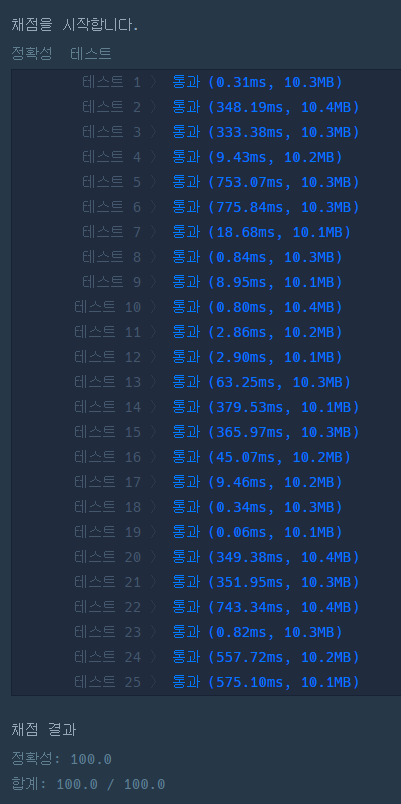

In [ ]:
from collections import Counter
from itertools import combinations_with_replacement

def solution(n, info):
    
    a_score = {e:x for e, x in zip(range(10, -1, -1), info)}
    a_record = [x for x in a_score.keys() if a_score[x]]
    
    max_gap = float('-inf')
    answer = []
    for scores in combinations_with_replacement(range(10+1), n):
        count = Counter(scores)
        score = sum([x for x in count.keys() if count[x] > a_score[x]])
        appeach = sum([x for x in a_record if count[x] <= a_score[x]])
        gap = score - appeach
        if gap > 0 :
            if gap > max_gap:
                answer = [count[x] for x in range(10, -1, -1)]
                max_gap = gap
            # elif gap == max_gap:   # -> combinations_with_replacement의 특성상 처음에 나온게 낮은 점수를 더 많이 맞춘 케이스가 됨
                # answers.append([count[x] for x in range(10, -1, -1)])
                
    
    if not answer:
        return [-1]
    return answer
    

In [ ]:
from itertools import combinations_with_replacement

def solution(n, info):
    max_gap = float('-inf')
    answer = [-1]
    
    for scores in combinations_with_replacement(range(11), n):
        ryan_info = [0] * 11
        for score in scores:
            ryan_info[10 - score] += 1
        
        ryan_score, appeach_score = 0, 0
        for i in range(11):
            if ryan_info[i] > info[i]:
                ryan_score += 10 - i
            elif info[i] > 0:
                appeach_score += 10 - i
        
        gap = ryan_score - appeach_score
        
        if gap > 0:
            if gap > max_gap:
                max_gap = gap
                answer = ryan_info
            elif gap == max_gap:
                # 더 낮은 점수를 많이 맞힌 경우가 우선이므로, 새로운 answer가 더 낮은 점수를 많이 맞히는지 확인
                for i in range(10, -1, -1):
                    if ryan_info[i] > answer[i]:
                        answer = ryan_info
                        break
                    elif ryan_info[i] < answer[i]:
                        break
    
    return answer


In [ ]:
def solution(n, info):
    global answer, result

    def score(ryan):
        s = 0
        for i in range(11):
            if ryan[i] == info[i] == 0:
                continue
            if ryan[i] > info[i]:
                s += 10 - i
            else:
                s -= 10 - i
        return s

    def dfs(idx, left, ryan):
        global answer, result
        if idx == -1 and left:
            return
        if left == 0:
            s = score(ryan)
            if result < s:
                answer = ryan[:]
                result = s
            return
        for i in range(left, -1, -1):
            ryan[idx] = i
            dfs(idx-1, left-i, ryan)
            ryan[idx] = 0

    answer = [0 for _ in range(11)]
    result = 0
    dfs(10, n, [0 for _ in range(11)])
    return answer if result != 0 else [-1]